# Final Project: Solving the Problems of an Edutech Company

- Name: Hanuga Fathur Chaerulisma
- Email: hanugafc@gmail.com

## Preparation

### Import necessary libraries

In [15]:
!pip install pandas numpy matplotlib seaborn scikit-learn sqlalchemy python-dotenv psycopg2-binary imbalanced-learn

In [16]:
!pip freeze > requirements.txt

In [17]:
# Manipulation and exploration data
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-prosesing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Export model
import joblib 

### Data Preparation

In [18]:
# Load the dataset
url_data = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv'
df = pd.read_csv(url_data)

# Display the first few rows of the dataset
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

### Data Exploration

In [19]:
# Display the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [20]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

Attrition                   412
EmployeeId                    0
StandardHours                 0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
MonthlyIncome                 0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
MonthlyRate                   0
MaritalStatus                 0
Age                           0
JobSatisfaction               0
JobRole                       0
JobLevel                      0
JobInvolvement                0
HourlyRate                    0
Gender                        0
EnvironmentSatisfaction       0
EmployeeCount                 0
EducationField                0
Education                     0
DistanceFromHome              0
Departme

In [21]:
# Check for unique values in columns 
unique_counts = df.nunique().sort_values()
print(unique_counts)

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
JobLevel                       5
Education                      5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [22]:
# Display the summary statistics of the dataset
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Acknowledgments:
1. Attrition: 412 missing values out of 1470 rows
2. Columns have only 1 unique value: EmployeeCount	, StandardHours, Over18	

### Exploratory Data Analysis (EDA)

#### Checking Distribution Data Target

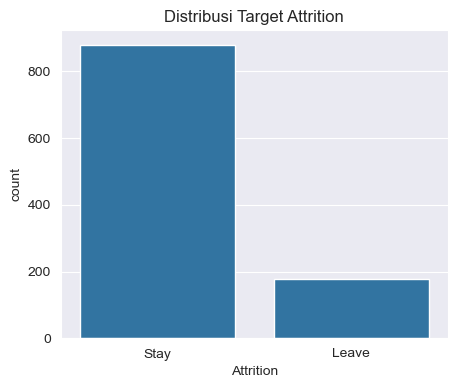

In [23]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Attrition', data=df)
plt.title("Distribusi Target Attrition")
plt.xticks([0, 1], ['Stay', 'Leave'])
plt.show()

Based on the distribution of the target variable, we can see that the dataset is imbalanced. The majority of employees stay (0) while a smaller portion leaves (1). This imbalance may affect the performance of our model, so we will need to address it during preprocessing.

#### Checking Trends  

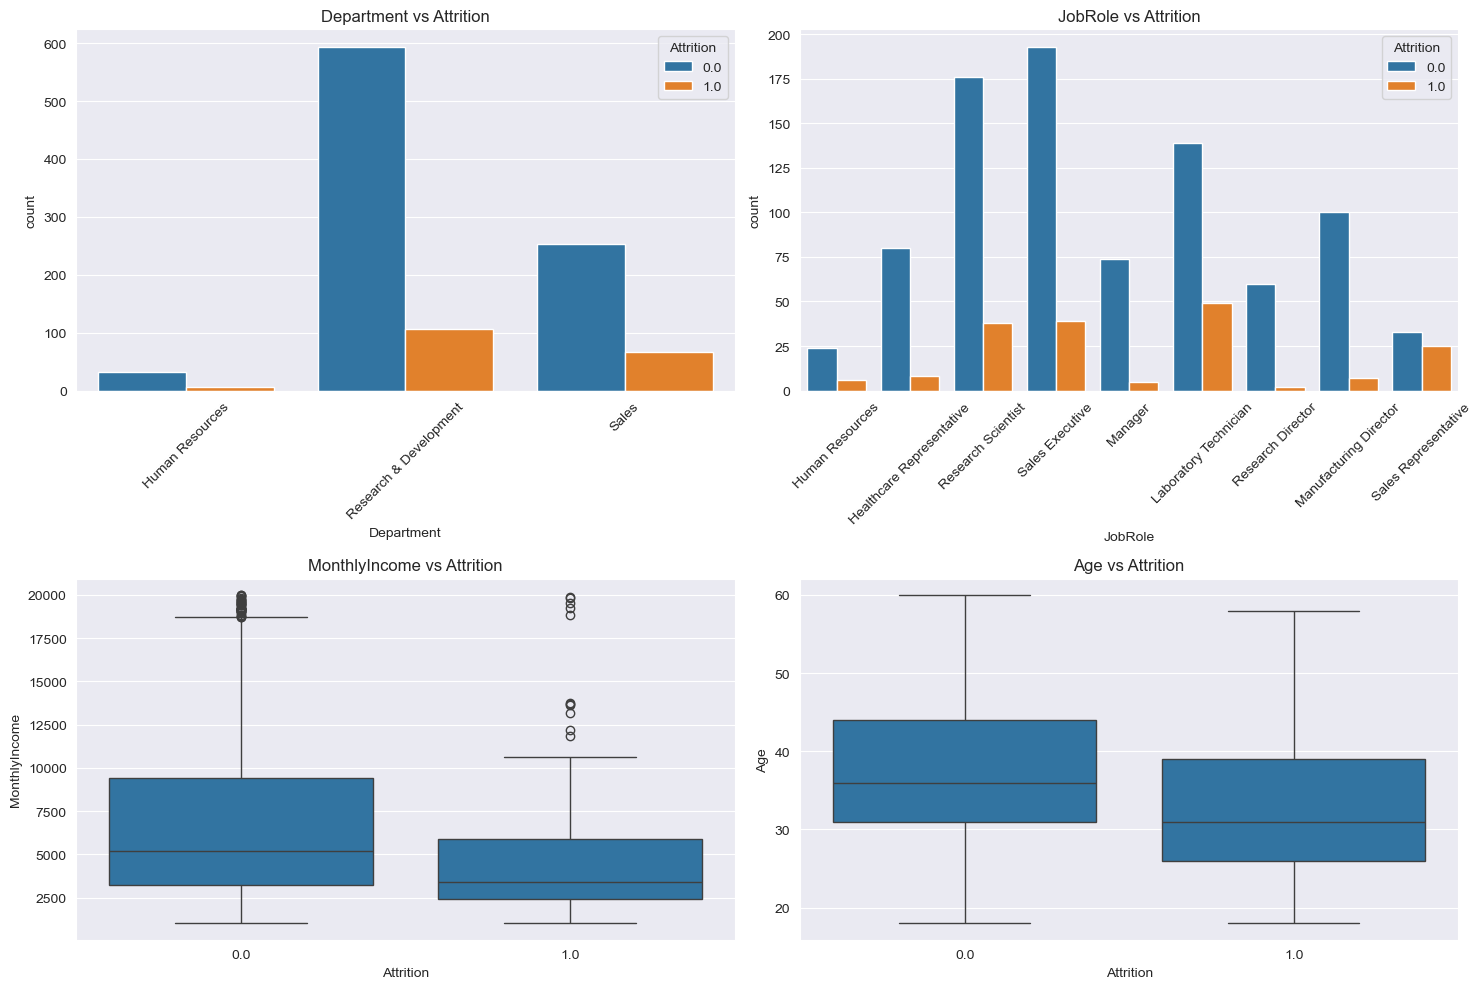

In [24]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot Department vs Attrition
sns.countplot(x='Department', hue='Attrition', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Department vs Attrition')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot JobRole vs Attrition
sns.countplot(x='JobRole', hue='Attrition', data=df, ax=axes[0, 1])
axes[0, 1].set_title('JobRole vs Attrition')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot MonthlyIncome vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axes[1, 0])
axes[1, 0].set_title('MonthlyIncome vs Attrition')

# Plot Age vs Attrition
sns.boxplot(x='Attrition', y='Age', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Age vs Attrition')

# Adjust layout
plt.tight_layout()
plt.show()

Insights:
1. Department vs Attrition
-  Most employees belong to the Research & Development department.
-  Sales shows a noticeable amount of attrition.
-  Human Resources has relatively low attrition.

2. JobRole vs Attrition
- Roles like Sales Executive and Research Scientist contribute significantly to attrition.
- Managerial roles like Manager, Research Director, and Manufacturing Director show very little attrition.

3.  MonthlyIncome vs Attrition
- Employees who stayed (0.0) generally have a wider range and higher median income.
- Employees who left (1.0) tend to earn less on average, with a tighter IQR (interquartile range).

4. Age vs Attrition
- The attrition group also has a narrower age spread, typically in the late 20s to early 40s.

#### Checking Correlation

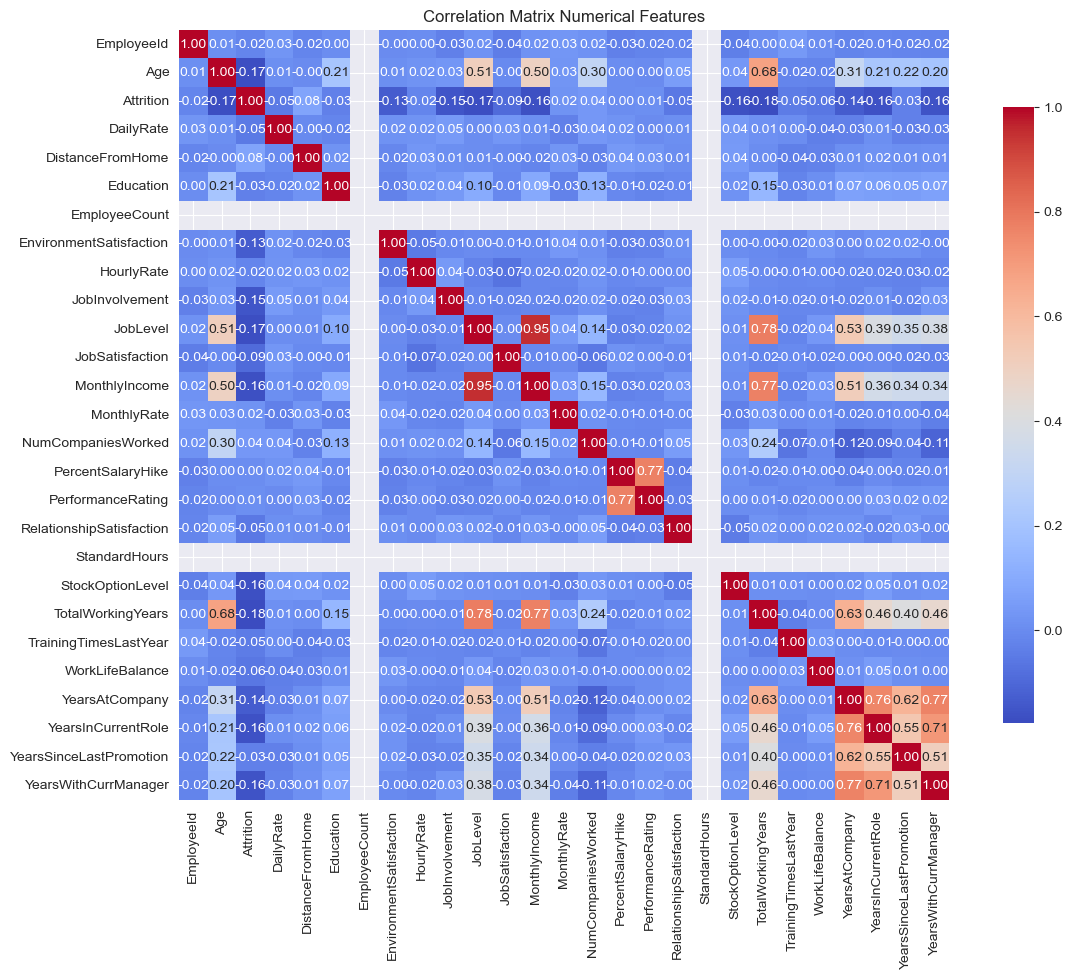

In [25]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix Numerical Features")
plt.show()

Key Insights:
1. Attrition most values around Attrition are very low.
- The most correlated features with Attrition are:
    1. EnvironmentSatisfaction
    2. YearsAtCompany
    3. JobInvolvement
    4. MonthlyIncome
    5. Age
    6. StockOptionLevel
    7. YearsInCurrentRole
    8. YearsWithCurrManager
2. The features with the High correlations between features are:
    1. YearsWithCurrManager & YearsAtCompany
    2. YearsAtCompany & YearsInCurrentRole	
    3. MonthlyIncome & JobLevel	
    4. MonthlyIncome & TotalWorkingYears

## Data Preparation / Preprocessing
1. Handling missing values on `Attrition`
2. Drop unused columns: `EmployeeCount` , `StandardHours`, `Over18`
3. Export the cleaned dataset to a CSV file
4. Sent the cleaned dataset to dataset

In [26]:
# Drop rows with missing Attrition values
df_cleaned = df.dropna(subset=["Attrition"])

# Drop uninformative columns
columns_to_drop = ["EmployeeCount", "StandardHours", "Over18"]
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Check the cleaned dataset shape and nulls
print("Cleaned dataset shape:", df_cleaned.shape)
print("Remaining missing values:\n", df_cleaned.isnull().sum())

Cleaned dataset shape: (1058, 32)
Remaining missing values:
 EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWith

In [27]:
# Export the cleaned DataFrame to a CSV file
cleaned_path = './data/cleaned_employee_data.csv'
df_cleaned.to_csv(cleaned_path, index=False)

print(f"Cleaned data exported to {cleaned_path}")

Cleaned data exported to ./data/cleaned_employee_data.csv


In [28]:
# Load the environment variables
load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")


# Create the database URL
DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"


# Create the SQLAlchemy engine
engine = create_engine(DATABASE_URL)
df_cleaned.to_sql('employee', con=engine, if_exists='replace', index=False)

print("Cleaned data sent to the database.")

Cleaned data sent to the database.


### Data Preprocessing 

In [29]:
df_model = df_cleaned.drop(columns=['EmployeeId']) # Drop unused columns

In [30]:
# Encode Categorical Variables
le = LabelEncoder()
categorical_cols = ['Gender', 'OverTime', 'BusinessTravel', 'Department', 
                    'EducationField', 'JobRole', 'MaritalStatus']

for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

In [31]:
# Split Features and Target
X = df_model.drop(columns=['Attrition'])  # Input features
y = df_model['Attrition']                # Target label

# Split 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train) # Use SMOTE to balance the dataset

# View class balance
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts().to_dict())

Before SMOTE: {0.0: 703, 1.0: 143}
After SMOTE: {0.0: 703, 1.0: 703}


## Modeling using Random Forest

In [34]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled) # Train the model

RandomForestClassifier(random_state=42)

## Evaluation

### Model Evaluation

In [35]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8443396226415094

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       176
         1.0       0.57      0.33      0.42        36

    accuracy                           0.84       212
   macro avg       0.72      0.64      0.67       212
weighted avg       0.82      0.84      0.83       212



### Confusion Matrix

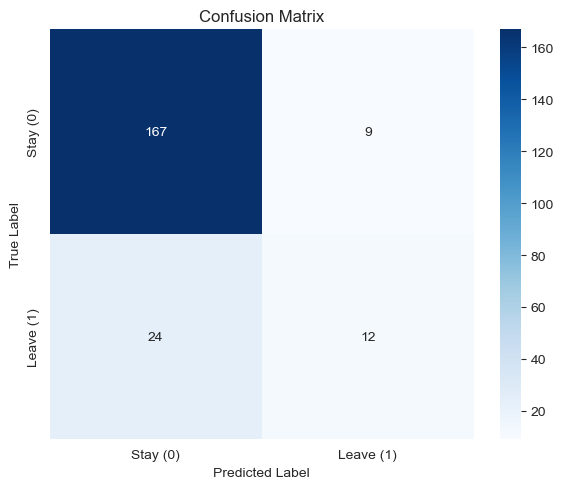

In [36]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Stay (0)', 'Leave (1)']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

### Feature Importance

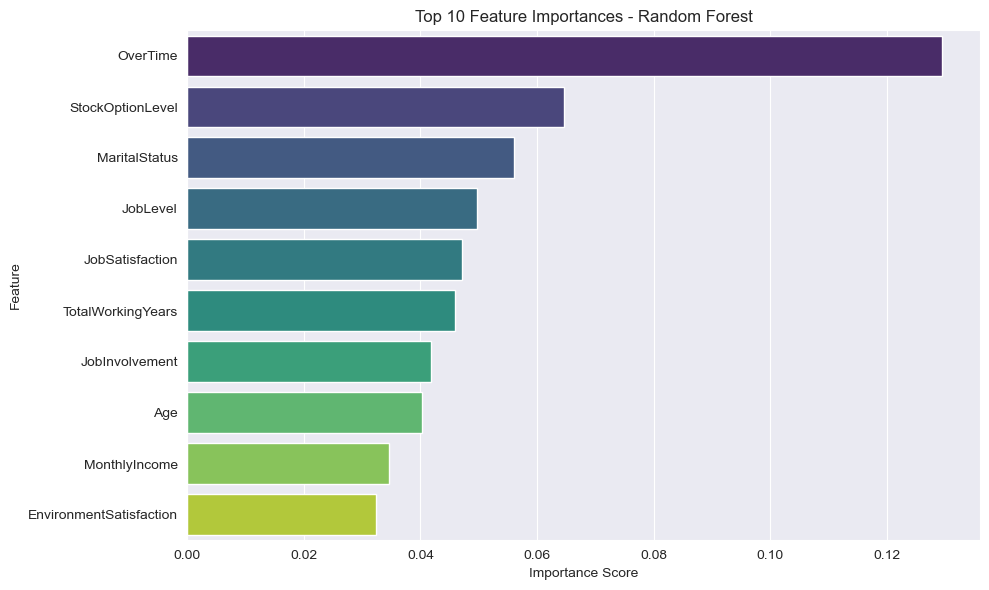

In [37]:
# Get feature names from X (before scaling)
feature_names = X.columns

# Get importance scores from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for easy sorting and plotting
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature', hue='Feature', palette='viridis')
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Export the Model

In [38]:
#Save model and scaler
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


## Testing The Model

In [39]:
!python prediction.py

Sample 1: Actual = Stay, Predicted = Stay
Sample 2: Actual = Leave, Predicted = Leave
Sample 3: Actual = Stay, Predicted = Stay
Sample 4: Actual = Stay, Predicted = Stay
Sample 5: Actual = Stay, Predicted = Stay
Sample 6: Actual = Stay, Predicted = Stay
Sample 7: Actual = Stay, Predicted = Stay
Sample 8: Actual = Stay, Predicted = Stay
Sample 9: Actual = Stay, Predicted = Stay
Sample 10: Actual = Stay, Predicted = Stay
